In [4]:
# Download the dataset using the Kaggle API
!kaggle datasets download -d asaniczka/uk-optimal-product-price-prediction

# Unzip the downloaded file into a directory named 'dataset'
!unzip -o uk-optimal-product-price-prediction.zip -d dataset


Dataset URL: https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction
License(s): ODC Attribution License (ODC-By)
 98%|███████████████████████████████████████▎| 115M/117M [00:04<00:00, 27.2MB/s]
100%|████████████████████████████████████████| 117M/117M [00:04<00:00, 25.0MB/s]
Archive:  uk-optimal-product-price-prediction.zip
  inflating: dataset/amz_uk_price_prediction_dataset.csv  


In [44]:
import pandas as pd
df = pd.read_csv("dataset/amz_uk_price_prediction_dataset.csv")
pd.set_option('display.expand_frame_repr', False)
df


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [48]:
freq_table = df['category'].value_counts()
top_5_categories = freq_table.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

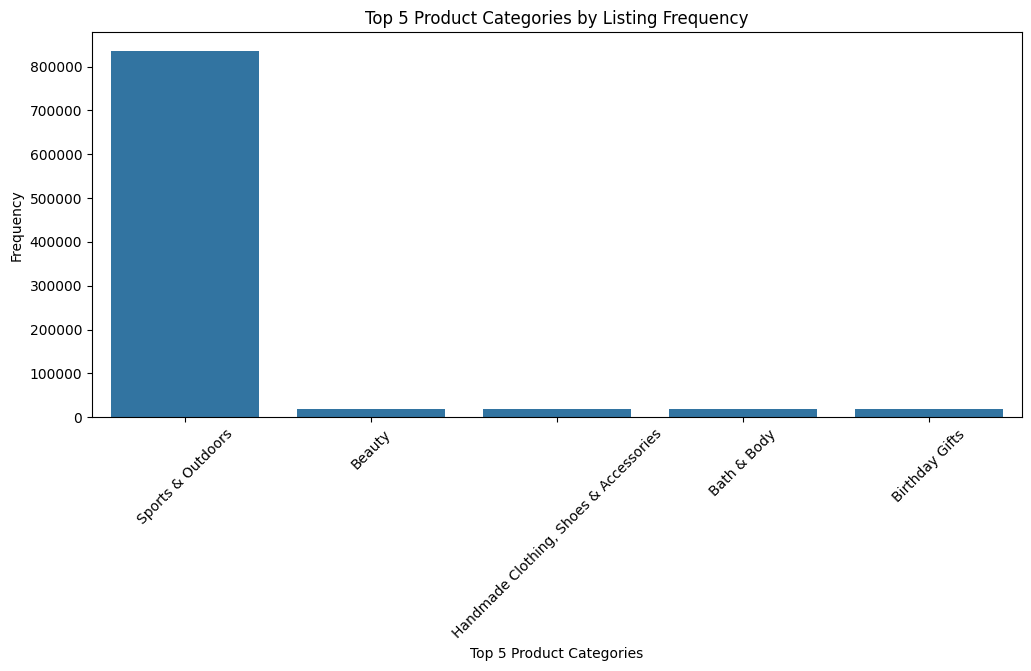

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values)
plt.xlabel("Top 5 Product Categories")
plt.ylabel("Frequency")
plt.title("Top 5 Product Categories by Listing Frequency")
plt.xticks(rotation=45)
plt.show()

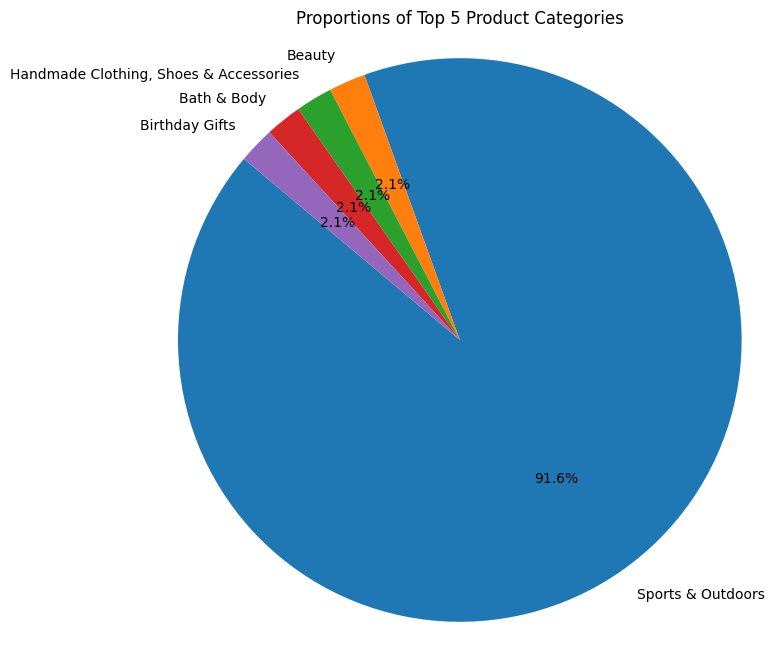

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories.values, labels=top_5_categories.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportions of Top 5 Product Categories")
plt.axis('equal')
plt.show()


In [97]:
mean = df["price"].mean()
median = df["price"].median()
mode_value = df['price'].mode().iloc[0]
print("mean", mean)
print("median", median)
print("mode", mode_value)
print(f"The mode {mode_value} is much smaller than the mean: {mean}")




mean 89.24380943923663
median 19.09
mode 9.99
The mode 9.99 is much smaller than the mean: 89.24380943923663


In [ ]:
variance = round(df['price'].var(), 2)
std_dev = round(df['price'].std(), 2)
range_val = df['price'].max() - df['price'].min()
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print("Variance:", variance)
print("Standard Deviation is far away from the mean, means there is a high varation:", std_dev)
print("The Range is huge, so theres a big spread:", range_val)
print("Interquartile Range is not so high, the middle 50 percent of the data is clustered:", iqr)


Variance: 119445.49
Standard Deviation is far away from the mean, means there is a high varation: 345.61
The Range is huge, so theres a big spread: 100000.0
Interquartile Range is not so high, the middle 50 percent of the data is clustered: 36.0


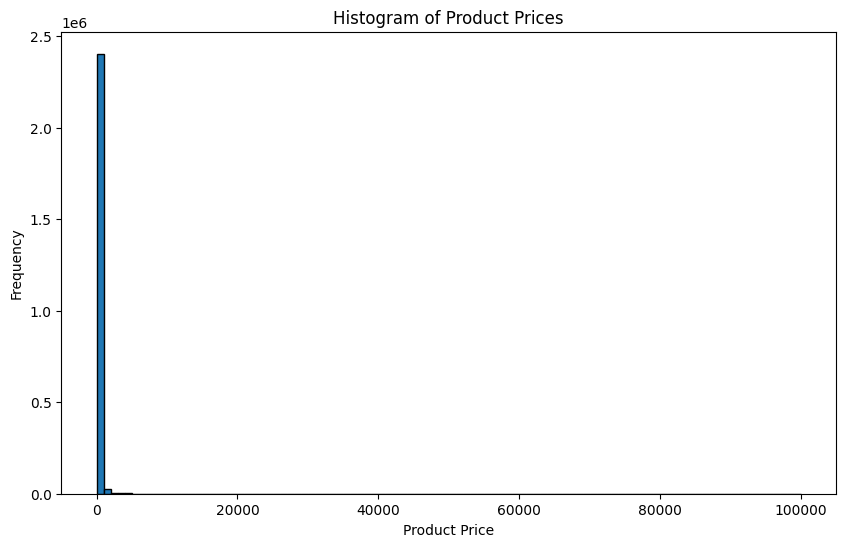

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100, edgecolor='k')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.title('Histogram of Product Prices')
plt.show()

# Answer: The outliers make it very hard to read the Histogram and stretch the x-axis way too much! Most prices are in the middle 50 percent.


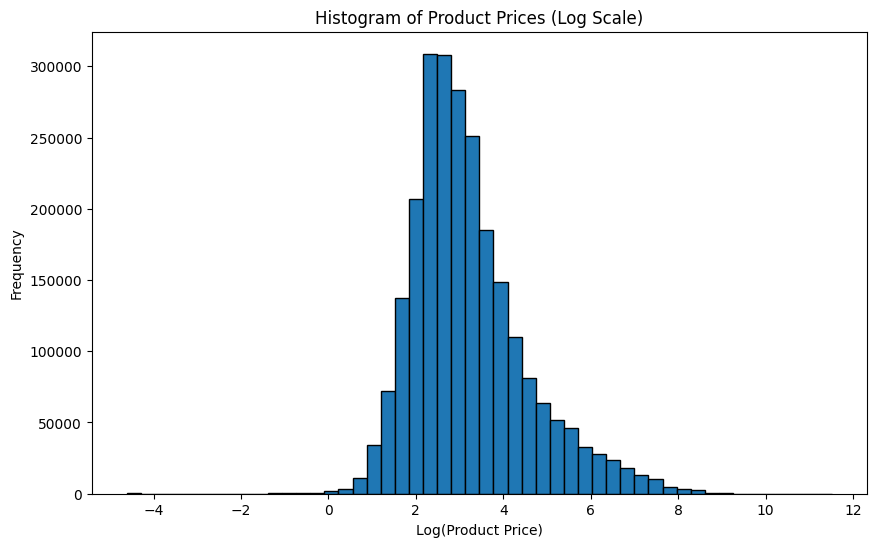

In [ ]:
import numpy as np

df_nonzero = df[df['price'] > 0]
plt.figure(figsize=(10, 6))
plt.hist(np.log(df_nonzero['price']), bins=50, edgecolor='k')
plt.xlabel('Log(Product Price)')
plt.ylabel('Frequency')
plt.title('Histogram of Product Prices (Log Scale)')
plt.show()
# One way to deal with this problems is a logarithmic transformation which we do here. It squishes the extreme prices and making the chart more readable.

In [ ]:
round(df["stars"].describe()),10
mean = df["stars"].mean()
median = df["stars"].median()
mode_value = df['stars'].mode().iloc[0]
print("mean", mean)
print("median", median)
print("mode", mode_value)
print(f"The median and the mode are both 0. I assume this means that those products are not rated at all. The mean is very low:{mean}. But i
      assume this is also because of a lot of products which are not rated products (which give out 0.0)")




mean 2.152836472966065
median 0.0
mode 0.0
The mode 0.0 is much smaller than the mean: 2.152836472966065


In [ ]:
variance = round(df['stars'].var(), 2)
std_dev = round(df['stars'].std(), 2)
range_val = df['stars'].max() - df['stars'].min()
iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print("Variance:", variance)
print("Standard Deviation is not very big:", std_dev)
print("The Range is expected, from 0 - 5:", range_val)
print("Interquartile Range is pretty high for a scale from 0 - 5. The Middle 50 percent of the data is 4.4 out of maximum 5", iqr)


Variance: 4.82
Standard Deviation is not very big: 2.19
The Range is expected, from 0 - 5: 5.0
Interquartile Range is pretty high for a scale from 0 - 5. The Middle 50 percent of the data is 4.4 out of maximum 5 4.4


In [107]:
skewness = df['stars'].skew()
kurtosis = df['stars'].kurt()

print("Skewness is almost symmetric:", skewness)
print("Kurtosis is flatter than a normal distribution with lighter tails and less peak:", kurtosis)


Skewness is almost symmetric: 0.08120735761080985
Kurtosis is flatter than a normal distribution with lighter tails and less peak: -1.9260061280432985


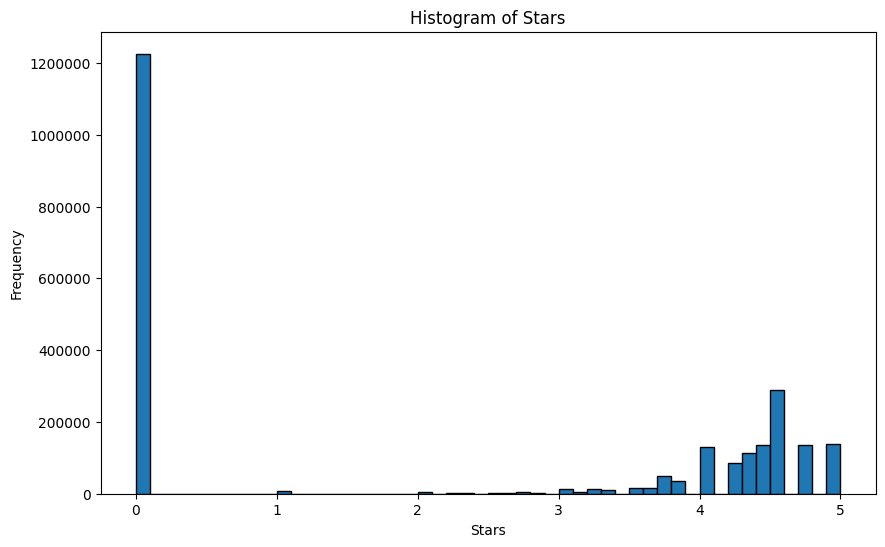

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=50, edgecolor='k')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Histogram of Stars')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Final Findings and Business Implications

## Product Categories
- **Dominance of Top Categories:**  
  A small number of product categories dominate the listings on Amazon UK.  
- **Actionable Insight:**  
  Focus on these top categories for increased visibility and targeted marketing strategies.

## Product Pricing
- **Central Tendency:**  
  - The **mean price** is higher than the **median**, indicating a right-skewed distribution caused by a few very high-priced items.
- **Dispersion:**  
  - The **Interquartile Range (IQR)** is narrow, showing that most products fall within a similar price range.
  - The overall **price range** is wide, highlighting the presence of outliers (extremely high-priced products).

## Product Ratings
- **Central Tendency:**  
  - The **mean** ratings are in the middle range, considering that most of the products are not rated (0.0) general ratings are between 4 and 5, which we can see in our Visualization. Very high ratings.
  - The **mode** confirms the most common rating given is 0 and most of the products are not rated at all.
- **Dispersion and Distribution Shape:**  
  - Low **variance** and **standard deviation** indicate that ratings are consistent.
  - The **skewness** is near zero, meaning the distribution is nearly symmetric.
  - The **kurtosis** is negative, implying a flatter distribution with lighter tails than a normal distribution.
- **Actionable Insight:**  
  Overall high customer satisfaction is indicated by the ratings looking at the chart. But needs further research if a 0.0 rating is not messing with all of our metric. It seems most real ratings are between 4 and 5 stars. I assume a 0.0 star is a not rated product, but another analysis is neccessary. If we keep that in mind, real ratings are mostly high.
